# Lab 5: Model Evaluation

In [275]:
import pandas as pd
import scipy as sp
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 0. Data Loading

In [276]:
#load data and extract data
names = ['age', 'workclass', 'fnlwgt', 'edu', 'edu-num', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv('adult.data', names=names)
print( "Total columns: ", len(df.columns))
df.head()                 # display all columns
#df[df.columns[:5]].head() # display the first 5 columns

Total columns:  15


,age,workclass,fnlwgt,edu,edu-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [277]:
from sklearn import preprocessing

# it is required that all feature/target values be numerical
# Systematically convert all string (labeled as object) type into labels(1,2,3,...)
label_encoding = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = label_encoding.fit_transform(df[column_name])
    else:
        pass

In [278]:
# extract X, y
y = df['income']      # two labels: <=50K, >50K
X = df.drop('income', axis=1)

y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Train/Test sizes:', y_train.shape[0], y_test.shape[0])

Train/Test sizes: 26048 6513


## 1. Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1)

## 2 Confusion matrix, precision, recall, f1-score, accuracy

In [281]:
# use 3-fold cross validation to predict y labels on the training dataset
# the predicted labels should be used 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(random_forest_clf, X_train, y_train, cv=3)

In [289]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# your code below for confusion matrix, precision, recall, f1-score, accuracy
# start of your code (don't modify code outside your code block)

#confusion matrix
print("Confusion matrix\n", confusion_matrix(y_true=y_train, y_pred=y_train_pred))
#precison calculation
print("Precison", precision_score(y_true=y_train, y_pred=y_train_pred))
#recall calculation
print("Recall", recall_score(y_true=y_train, y_pred=y_train_pred))
#f1 measure calculation
print("Precison", f1_score(y_true=y_train, y_pred=y_train_pred))
#accuracy calculation
print("Accuracy", accuracy_score(y_true=y_train, y_pred=y_train_pred))

# end of your code (don't modify code outside your code block)

Confusion matrix
 [[18318  1376]
 [ 2460  3894]]
Precison 0.7388994307400379
Recall 0.6128423040604344
Precison 0.669993117687543
Accuracy 0.8527334152334153


## 3 ROC curve and AUC score

In [283]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--', label='Random')
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.show()

In [284]:
# use 3-fold cross validation to predict y probabilities (for each class) on the training dataset
y_train_prob = cross_val_predict(random_forest_clf, X_train, y_train, cv=3, method="predict_proba")

#Important: 
# y_train_prob is numpy 2-d array, where each row is the predicted probablities for each class
# in this dataset we have two classes (<=50K, and >50K), so we have two probability scores
# e.g., the first row (0.76, 0.24) means the probability predicting <=50K is .76, 
#       and the probability predicting >50K is .24, 
#       for ROC curve and score calculation, we only need the second column as our predicted scores
y_train_prob[:3]

array([[0.76, 0.24],
       [0.28, 0.72],
       [0.12, 0.88]])

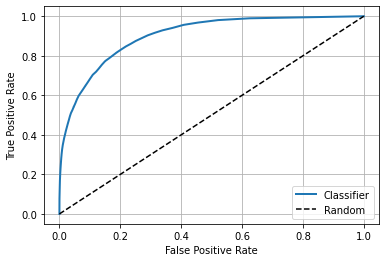

In [285]:
from sklearn.metrics import roc_curve

# your code below for roc_curve (i.e., display roc plot)

# start of your code (don't modify code outside your code block)

fpr, tpr, thresholds = roc_curve(
    y_true = y_train,
    y_score = y_train_prob[:,1],
    #pos_label=1
) 

plot_roc_curve(fpr, tpr, label='Classifier')
plt.show()

# end of your code (don't modify code outside your code block)

In [286]:
from sklearn.metrics import roc_auc_score

# your code below for auc score
# start of your code (don't modify code outside your code block)

roc_auc_score(y_true = y_train, y_score = y_train_prob[:,1])

# end of your code (don't modify code outside your code block)

0.9016549964536094